In [1]:
import sys
import os
# Getting src path to import modules
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))

# Adding src path to the system path, if not already added
if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import pandas as pd
import numpy as np
from dl_models import ANN as ann
from dl_models import RNN as rnn
from ml_models import RandomForest as rf
from ml_models import PolynomialFeatures as pf
# from causal_models import CausalDiscovery as cd
from utils import plots as plt

In [3]:
# Time series data for a specific building (Building_1.csv/Building_2.csv/Building_3.csv).
electricity_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/Building_1.csv")

# Carbon intensity data.
carbon_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/carbon_intensity.csv")

# Pricing data.
pricing_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/pricing.csv")

# Weather data.
weather_data = pd.read_csv("../data/citylearn_challenge_2023_phase_1/weather.csv")

# Concatenate multiple datasets along the columns to create a single dataset.
df = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)

# Displaying the last 5 samples of the dataframe to show its structure.
df.tail()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,...,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
715,6,20,6,0,24.468618,0.024173,54.277103,0.442291,0.398354,5.189857,...,32.905895,89.465866,73.861000,40.875510,0.0,110.15520,0.0,0.0,271.32200,0.0
716,6,21,6,0,24.444859,0.000415,54.351337,0.990416,0.199180,4.550693,...,32.669003,87.158066,66.389130,64.036320,0.0,216.20418,0.0,0.0,151.80556,0.0
717,6,22,6,0,24.444464,0.000019,54.532566,1.563732,0.000000,4.043389,...,29.979940,100.000000,58.228535,51.990180,0.0,259.28485,0.0,0.0,374.21823,0.0
718,6,23,6,0,24.444452,0.000009,54.647182,0.421510,0.000000,3.268111,...,28.337627,90.768420,35.361465,60.445404,0.0,272.40073,0.0,0.0,582.50290,0.0
719,6,24,6,0,21.812447,0.145780,63.234272,0.374985,0.000000,6.492827,...,25.415920,82.899440,47.129494,56.078560,0.0,129.96535,0.0,0.0,842.14680,0.0


In [4]:
target = 'cooling_demand'

features = ['month', 'hour', 'day_type', 'daylight_savings_status', 'indoor_dry_bulb_temperature', 'average_unmet_cooling_setpoint_difference', 
            'indoor_relative_humidity', 'non_shiftable_load', 'dhw_demand', 'heating_demand', 'solar_generation', 'occupant_count', 
            'indoor_dry_bulb_temperature_set_point', 'hvac_mode', 'carbon_intensity', 'electricity_pricing', 
            'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h', 'electricity_pricing_predicted_24h', 
            'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity', 'diffuse_solar_irradiance', 'direct_solar_irradiance', 
            'outdoor_dry_bulb_temperature_predicted_6h', 'outdoor_dry_bulb_temperature_predicted_12h', 'outdoor_dry_bulb_temperature_predicted_24h', 
            'outdoor_relative_humidity_predicted_6h', 'outdoor_relative_humidity_predicted_12h', 'outdoor_relative_humidity_predicted_24h', 
            'diffuse_solar_irradiance_predicted_6h', 'diffuse_solar_irradiance_predicted_12h', 'diffuse_solar_irradiance_predicted_24h', 
            'direct_solar_irradiance_predicted_6h', 'direct_solar_irradiance_predicted_12h', 'direct_solar_irradiance_predicted_24h']

In [5]:
real_ann, pred_ann = ann.ANN(df, features, target)

Epoch 1/150
13/13 [==============================] - 1s 15ms/step - loss: 9.9171 - mean_absolute_error: 2.5831 - val_loss: 5.5561 - val_mean_absolute_error: 1.8024
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 4.0728 - mean_absolute_error: 1.5558 - val_loss: 2.5390 - val_mean_absolute_error: 1.2557
Epoch 3/150
13/13 [==============================] - 0s 5ms/step - loss: 2.8896 - mean_absolute_error: 1.3759 - val_loss: 2.1751 - val_mean_absolute_error: 1.1796
Epoch 4/150
13/13 [==============================] - 0s 5ms/step - loss: 2.3266 - mean_absolute_error: 1.2208 - val_loss: 1.9422 - val_mean_absolute_error: 1.1388
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 1.9922 - mean_absolute_error: 1.1266 - val_loss: 1.7041 - val_mean_absolute_error: 1.0722
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 1.7246 - mean_absolute_error: 1.0435 - val_loss: 1.5128 - val_mean_absolute_error: 1.0050
Epoch 7/150
13/13 [==

In [6]:
real_poly, pred_poly = pf.Polynomial(df, features, target, 5)

In [7]:
real_rf, pred_rf = rf.RandomForest(df, features, target)

In [8]:
real_rnn, pred_rnn = rnn.RNN(df, target, 5)

Epoch 1/150
13/13 [==============================] - 2s 65ms/step - loss: 3.3098 - mean_absolute_error: 0.7142 - val_loss: 0.0216 - val_mean_absolute_error: 0.1147
Epoch 2/150
13/13 [==============================] - 0s 23ms/step - loss: 0.0235 - mean_absolute_error: 0.1200 - val_loss: 0.0244 - val_mean_absolute_error: 0.1236
Epoch 3/150
13/13 [==============================] - 0s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.1136 - val_loss: 0.0145 - val_mean_absolute_error: 0.0897
Epoch 4/150
13/13 [==============================] - 0s 22ms/step - loss: 0.0134 - mean_absolute_error: 0.0886 - val_loss: 0.0129 - val_mean_absolute_error: 0.0823
Epoch 5/150
13/13 [==============================] - 0s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0758 - val_loss: 0.0105 - val_mean_absolute_error: 0.0736
Epoch 6/150
13/13 [==============================] - 0s 22ms/step - loss: 0.0089 - mean_absolute_error: 0.0679 - val_loss: 0.0111 - val_mean_absolute_error: 0.0745
Epoch 7/150
13/1

In [9]:
#real_cd, pred_cd = cd.CausalDiscovery(df, target)

In [10]:
models = {
    'ANN': (real_ann, pred_ann),
    'Polynomial': (real_poly, pred_poly),
    'RandomForest': (real_rf, pred_rf),
    'RNN': (real_rnn, pred_rnn)
}

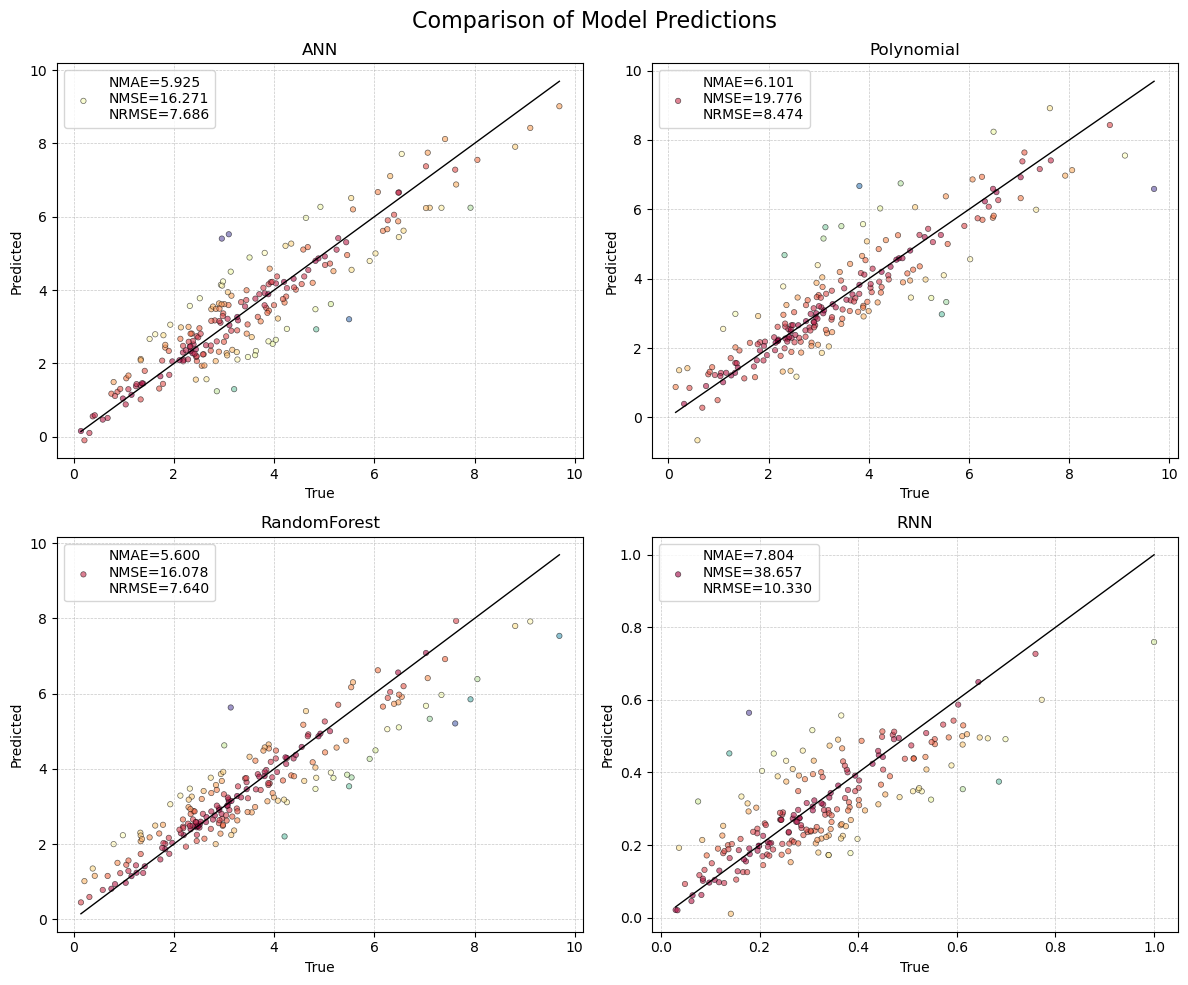

In [12]:
plt.plot_cmp(models, percent=True)